Often when we get a dataset, we might find a plethora of features in the dataset. All of the features we find in the dataset might not be useful in building a machine learning model to make the necessary prediction. Using some of the features might even make the predictions worse. So, feature selection plays a huge role in building a machine learning model.

We are using the famous breast cancer dataset (all numerical dataset) to build a template for feature selection based on correlation and p value


In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [155]:
df = pd.read_csv('data (1).csv')

In [156]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [157]:
data = df.iloc[:,1:-1]

In [158]:
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

**Selecting features based on correlation**


In [159]:
corr = data.corr()
corr.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738


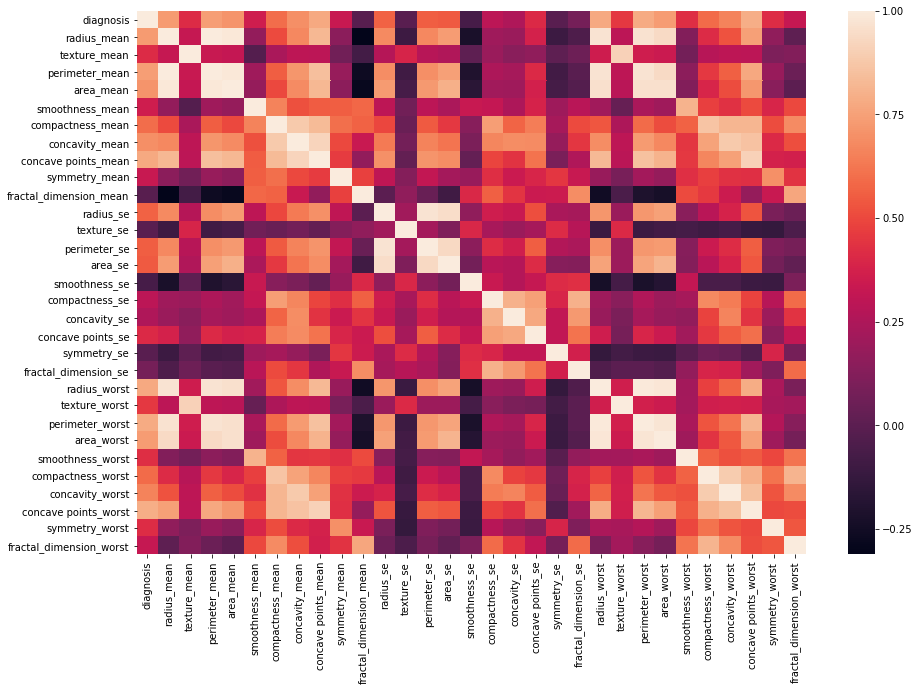

In [160]:
plt.figure(figsize=(15,10))
sns.heatmap(corr)

In [161]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            columns[j] = False

In [162]:
selected_columns = data.columns[columns]
selected_columns.shape

(21,)

**21 columns were selected.**

In [163]:
data = data[selected_columns]
data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,1.0,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,1.0,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,1.0,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,1.0,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [164]:
selected_columns = selected_columns[1:].values 

**Selecting columns based on p-value**


In [165]:
import statsmodels.formula.api as sm
def pvalue(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [166]:
SL = 0.05
data_modeled, selected_columns = pvalue(data.iloc[:,1:].values, data.iloc[:,0].values, SL, selected_columns)

Moving the result to a new dataframe

In [167]:
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,0]

In [168]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns)


**Visualizing the selected features**


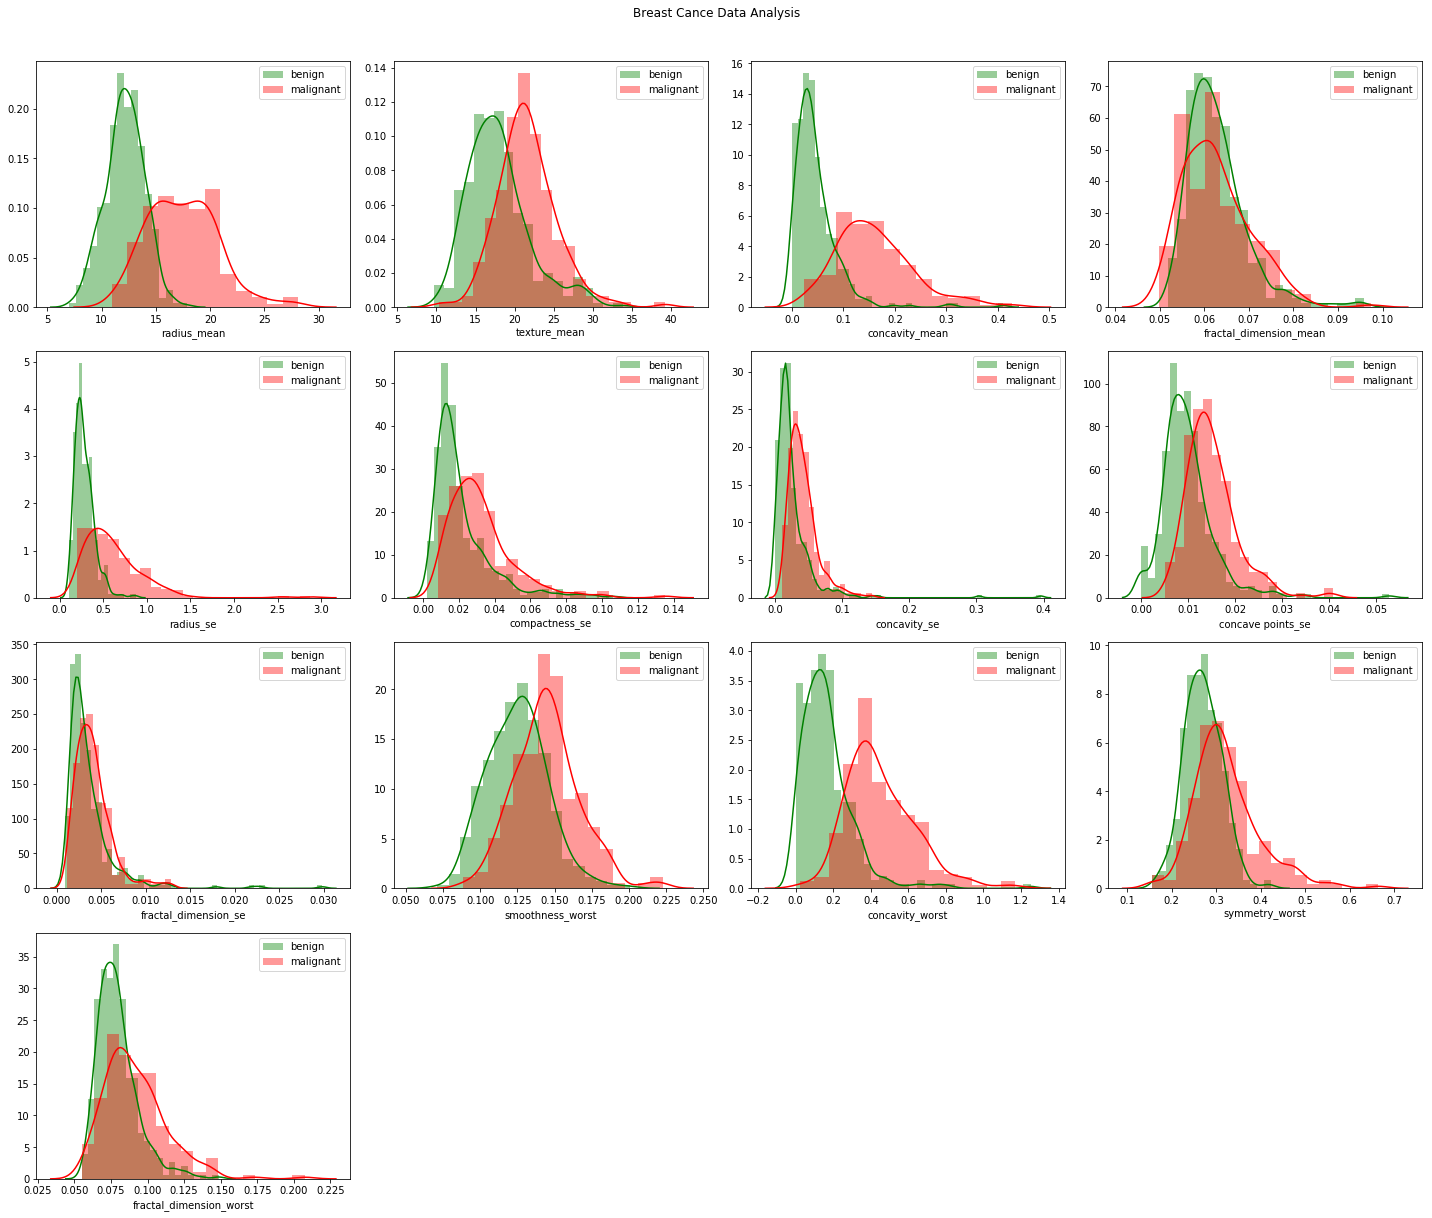

In [169]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data[i][result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

# Building a model with the selected features###


In [170]:
x = data.values
y = result.values

In [171]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [172]:
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [173]:
prediction = svc.predict(x_test)


In [174]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))


[[103   6]
 [ 10  52]]
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93       109
         1.0       0.90      0.84      0.87        62

   micro avg       0.91      0.91      0.91       171
   macro avg       0.90      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171

0.9064327485380117


**Building a model without feature selection and comparing the results**

In [175]:
data = pd.read_csv('data (1).csv')          
result = pd.DataFrame()
result['diagnosis'] = data.iloc[:,1]
data = data.iloc[:,2:-1]                         
label_encoder = LabelEncoder()              
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')    
x_train, x_test, y_train, y_test = train_test_split(data.values, result.values, test_size = 0.2)      
svc = SVC()
svc.fit(x_train, y_train)                        
prediction = svc.predict(x_test)                 
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))
print(accuracy_score(y_test, prediction))

[[72  0]
 [42  0]]
              precision    recall  f1-score   support

           B       0.63      1.00      0.77        72
           M       0.00      0.00      0.00        42

   micro avg       0.63      0.63      0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114

0.631578947368421
